### ESMA 3016
### Edgar Acuna
### Lab15: Distribuciones Continuas:  Uniforme y Exponencial
### La Distribucion Uniforme y su aplicacion a simulacion.

$$f(x)=\frac{1}{b-a},$$

para $a<x<b$

In [1]:
from scipy.stats  import uniform,expon,binom
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#El valor de la funcion de densidad uniforme (0,1) en el punto .1
uniform.pdf(.1) 

1.0

In [3]:
#La probabilidad acumulada de la Uniforme (0,1) hasta .1
uniform.cdf(.1)

0.1

In [4]:
#La probabilidad de una Uniforme entre .4 y .5 es
uniform.cdf(.5)-uniform.cdf(.4)

0.09999999999999998

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([1.02404377, 1.00004275, 1.03504424, 0.98304202, 1.00804309,
        1.02104365, 0.99404249, 0.99404249, 0.95104065, 0.99004232]),
 array([3.48611280e-06, 9.99992115e-02, 1.99994937e-01, 2.99990662e-01,
        3.99986388e-01, 4.99982113e-01, 5.99977838e-01, 6.99973564e-01,
        7.99969289e-01, 8.99965014e-01, 9.99960740e-01]),
 <a list of 10 Patch objects>)

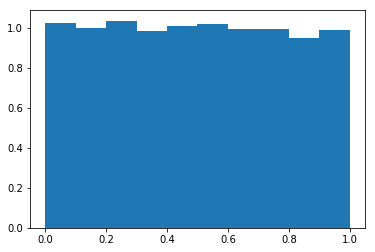

In [ ]:
#Simulando 10,000 uniformes (0,1) y haciendo su histograma
plt.hist(uniform.rvs(0,1,10000),normed=True)

In [ ]:
#Distribucion Uniforme en un intervalo (a,b)=(2,10)
#Hay que usar los parametros loc=a y scale=b-a
#Hallando la funcion de densidad de la uniforme U(2,10) en el punto x=2.5
uniform.pdf(2.5,loc=2,scale=8)

0.125

In [ ]:
#Hallando la probabilidad acumulada de la U(2,10) hasta el valor x=6. O sea P(X<6)
uniform.cdf(6,loc=2,scale=8)

0.5

In [ ]:
#Hallando el percentil correspondiente a una probabilidad de .9
uniform.ppf(.9,loc=2,scale=8)

9.2

In [ ]:
#**********************************************************
#Generando al azar n valores de una bernoulli con parametro p
#*********************************************************
def bernoulli(p,m):
    x=[0]*m
    for i in range(m):
        if uniform.rvs(0,1,1)<p:
            x[i]=1 
    return x

In [ ]:
bernoulli(.3,20)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1]

In [ ]:
#Otra forma
def bernoulli1(p,m):
    b=[uniform.rvs(0,1,1)<p for _ in range(0,m)]
    return [int(x) for x in b]

In [ ]:
bernoulli1(.3,20)

[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]

In [ ]:
#************************************************************
#Generando al azar m valores de una binomial con parametros n y p
#************************************************************
#La suma de n Bernoulli's da una binomial(n,p)
def rbinomial(p,n,m):
    x=[0]*m
    for i in range(m): 
        y=0
        for j in range(n):
            y+=sum(bernoulli(p,1))
        x[i]=y    
    return x

In [ ]:
import time
start_time = time.time()
rbinomial(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinomial(.5,6,20)

--- 3.2385947704315186 seconds ---


[1, 3, 4, 2, 6, 4, 4, 3, 4, 5, 5, 3, 2, 5, 4, 5, 6, 4, 3, 4]

In [ ]:
#Otra forma
def rbinom1(p,n,m):
    b=[bernoulli1(p,n) for _ in range(0,m)]
    return np.sum(b,axis=1)

In [ ]:
start_time = time.time()
rbinom1(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinom1(.5,6,20)

In [ ]:
start_time = time.time()
binom.rvs(6,.5,size=10000)
print("--- %s seconds ---" % (time.time() - start_time))
binom.rvs(6,.5,size=20)

### Distribucion exponencial
$$f(x)=\frac{1}{\theta}e^{-\frac{x}{\theta}},$$

para $x>0$, tambien $\theta>0$

In [ ]:
#***************************************************************************
#simulando una muestra de 200 tiempos de espera en un banco
#se esta considerando que el tiempo de espera promedio es 10 minutos
#los tiempos estan dados en minutos
#******************************************************************************* 
tiempos=expon.rvs(scale=10,size=200)

In [ ]:
#Generando un histograma de los datos pero de tal manera que el area total sea 1
x=np.arange(0,100,.5)
#Haciendo una comparacion grafica
fig, ax = plt.subplots(1, 1)
ax.hist(tiempos, normed = True,alpha=.7)
ax.plot(x, expon.pdf(x,scale=10), 'k-', lw=1, label='densidad exponencial')
ax.legend(loc='best', frameon=False)

Cual es la probabilidad de que se tenga que esperar mas de 15 minutos para ser atendido?
Area bajo la curva mas alla de 15

$$P(x>15)=\int_{15}^{\infty}\frac{1}{10}e^{-\frac{x}{10}}dx$$

In [ ]:
#Calculando aproximadamente la integral
def integrando(x):
    return np.exp(-x/10)/10
quad(integrando,15,np.Inf)

#### El primer valor es el resultado de la integral y el segundo es el error del resultado

In [ ]:
#Haciendolo por complemento=1-area hasta 15 y usando la densidad exponencial
1-expon.cdf(15,scale=10)

In [ ]:
#Estimando la probabilidad
probest=len(tiempos[tiempos>15])/float(200)
probest